In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

In [2]:
titanic_data = pd.read_csv('titanic_train.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Analysis

In [3]:
titanic_data.shape

(891, 12)

In [4]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [7]:
print('Number of passengers in original data: ', len(titanic_data.index))

Number of passengers in original data:  891


In [8]:
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

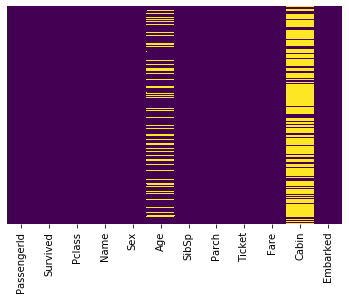

In [10]:
sns.heatmap(titanic_data.isnull(), yticklabels=False, cbar=False,cmap='viridis')

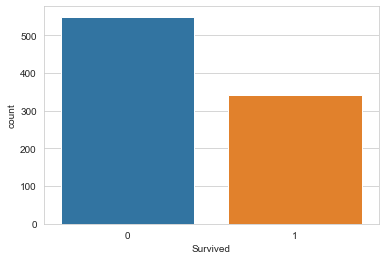

In [11]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', data=titanic_data)

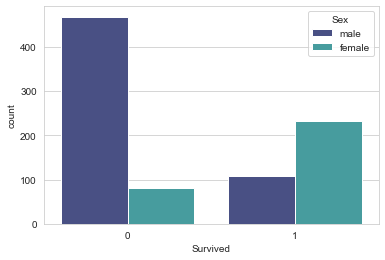

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue ='Sex', data=titanic_data, palette='mako')

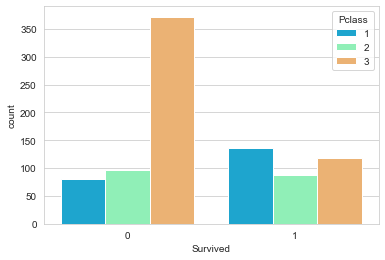

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=titanic_data, palette='rainbow')

Text(0.5, 0, 'Age')

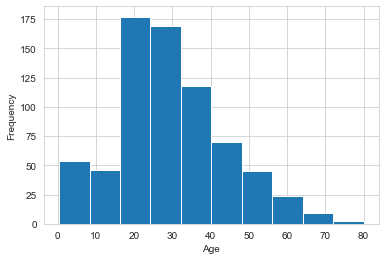

In [14]:
titanic_data.Age.plot.hist()
plt.xlabel('Age')

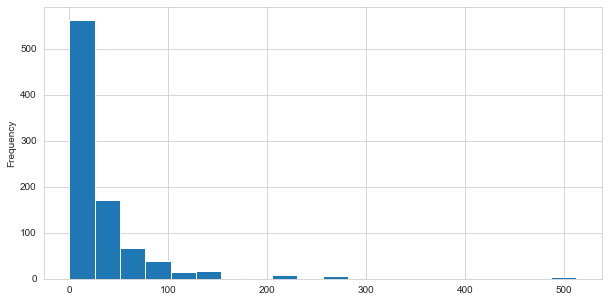

In [15]:
titanic_data.Fare.plot.hist(bins = 20, figsize = (10,5))

## Data Cleaning

We want to fill the missing Age data instead of just droping the missing age data rows. So, we will check the average age by passenger class.

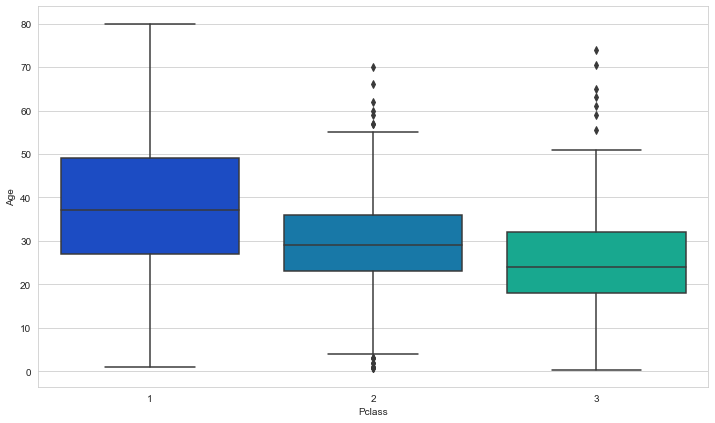

In [16]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y= 'Age', data= titanic_data, palette='winter')

In [17]:
def avg_age(a):
    Age = a[0]
    Pclass = a[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 38
        
        elif Pclass == 2:
            return 29
        
        else:
            return 24
        
    else:
        return Age

In [18]:
titanic_data['Age'] = titanic_data[['Age', 'Pclass']].apply(avg_age, axis=1)

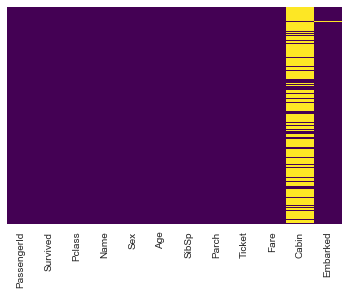

In [19]:
sns.heatmap(titanic_data.isnull(), yticklabels=False, cbar=False, cmap = 'viridis')

In [20]:
titanic_data.drop('Cabin', axis = 1 , inplace=True)

In [21]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


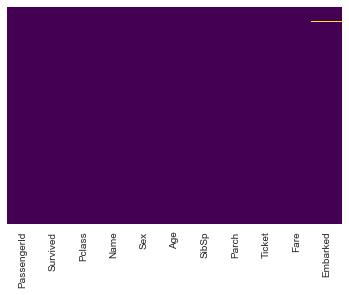

In [22]:
sns.heatmap(titanic_data.isnull(), yticklabels=False, cbar=False, cmap = 'viridis')

In [23]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [24]:
titanic_data.dropna(inplace=True)

In [25]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [26]:
gender = pd.get_dummies(titanic_data.Sex, drop_first=True)
gender.head(5)

,male
0,1
1,0
2,0
3,0
4,1


In [27]:
embark = pd.get_dummies(titanic_data.Embarked)
embark.head(5)

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [28]:
Pclass = pd.get_dummies(titanic_data.Pclass, drop_first=True)
Pclass.head(5)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [29]:
titanic_data = pd.concat([titanic_data,gender,embark,Pclass], axis = 1)

In [30]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,C,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,1,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,0,1,0,1


In [31]:
titanic_data.drop(['Sex', 'Embarked', 'PassengerId', 'Name', 'Ticket'],axis=1,inplace=True)

In [32]:
titanic_data.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S,2,3
0,0,3,22.0,1,0,7.2500,1,0,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1,0,0
4,0,3,35.0,0,0,8.0500,1,0,0,1,0,1


In [33]:
titanic_data.drop('Pclass', axis=1,inplace=True)

In [34]:
titanic_data

,Survived,Age,SibSp,Parch,Fare,male,C,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,0,1,0,1
1,1,38.0,1,0,71.2833,0,1,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,1,0,0,1,1,0
887,1,19.0,0,0,30.0000,0,0,0,1,0,0
888,0,24.0,1,2,23.4500,0,0,0,1,0,1
889,1,26.0,0,0,30.0000,1,1,0,0,0,0


## Train and Testing data

In [35]:
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [38]:
Log_model = LogisticRegression()

In [39]:
Log_model.fit(X_train, y_train)

C:\Users\rishi patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
pred = Log_model.predict(X_test)

In [41]:
pred

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0], dtype=int64)

In [42]:
y_test

387    1
259    1
771    0
208    1
683    0
      ..
614    0
35     0
46     0
436    0
292    0
Name: Survived, Length: 223, dtype: int64

In [43]:
Log_model.score(X_test, y_test)

0.8430493273542601

In [44]:
from sklearn.metrics import classification_report

In [45]:
classification_report(y_test, pred)

'              precision    recall  f1-score   support\n\n           0       0.87      0.88      0.87       138\n           1       0.80      0.79      0.79        85\n\n    accuracy                           0.84       223\n   macro avg       0.83      0.83      0.83       223\nweighted avg       0.84      0.84      0.84       223\n'

## Confusion Matrix

In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
cm = confusion_matrix(y_test, pred)
cm

array([[121,  17],
       [ 18,  67]], dtype=int64)

Text(70.0, 0.5, 'Actual')

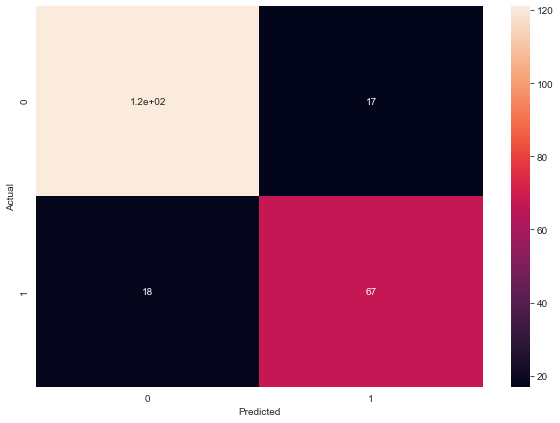

In [48]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')